In [33]:
import networkx as nx
import pandas as pd
import numpy as np
from os.path import join
from glob import glob

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error

#from matplotlib import rc
#rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})

#rc('text', usetex=True)

In [35]:
from math import pi

In [36]:
import plotly.express as px

In [37]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [38]:
import plotly.offline as py

In [39]:
import powerlaw

In [40]:
DATA = "/Users/rdora/breast_cancer/data/"
FIG = "/Users/rdora/Dropbox/inmegen/breast_cancer/article/figures/"

# Power law

In [21]:
df =  pd.read_csv("/Users/rdora/breast_cancer/healthy/gene-range_100.csv")
G = nx.from_pandas_edgelist(df,
                            source="gene_1",
                            target="gene_2")
deg = [d for v, d in G.degree]

In [22]:
results = powerlaw.Fit(deg)
print(results.power_law.alpha)
print(results.power_law.xmin)
R, p = results.distribution_compare('power_law', 'exponential', normalized_ratio=True)

3.3316508401361014
62.0


Calculating best minimal value for power law fit


In [88]:
results.distribution_compare?

In [23]:
R

-2.04092683069313

In [24]:
p

0.04125810045991504

In [25]:
df =  pd.read_csv("/Users/rdora/breast_cancer/healthy/top/gene-range_9_10.csv")
G = nx.from_pandas_edgelist(df.iloc[:1000],
                            source="gene_1",
                            target="gene_2")
deg = [d for v, d in G.degree]

In [26]:
results = powerlaw.Fit(deg)
print(results.power_law.alpha)
print(results.power_law.xmin)
R, p = results.distribution_compare('power_law', 'lognormal', normalized_ratio=True)

Calculating best minimal value for power law fit


2.3964292918031873
2.0


In [27]:
R

0.18135329274029033

# Organization

We want to show that a group of nodes is kept or conserved throughout the different co-expression layers.

## Hubs and Core

We'll start with the hub nodes and then the nodes of the core.

In [29]:
hubs = []
for tissue in ["healthy", "basal"]:
    for i in range(101):
        path = f"/Users/rdora/breast_cancer/{tissue}/gene-range_{i}.csv"
        temp = pd.read_csv(path)
        G = nx.from_pandas_edgelist(temp,
                                   source="gene_1",
                                   target="gene_2")
        deg = [d for v, d in G.degree]
        mu = np.mean(deg)
        sigma = np.std(deg)
        h = [[tissue, i, v, d] for v, d in G.degree if d >= mu + 2 * sigma]
        hubs.extend(h)
hubs = pd.DataFrame(hubs, columns=["tissue", "layer", "node", "degree"])

In [30]:
hubs = hubs[hubs.layer >= 0]

In [32]:
print(f"Hubs have degree greater than "
      f"{mu + 2 * sigma} in the top layer")

Hubs have degree greater than 53.80126980380292 in the top layer


In [87]:
# How many of the nodes in the top core are everywhere else?
dfs = []
for tissue in ['healthy', 'basal']:
    top_nodes = set(hubs[(hubs.layer==100)&(hubs.tissue==tissue)].node.unique())
    int_nodes = set(hubs[(hubs.layer==100)&(hubs.tissue==tissue)].node.unique())
    int_hubs_top = [[tissue, 100, 1]]
    for i in range(99, -1, -1):
        layer_nodes = set(hubs[(hubs.layer==i)&(hubs.tissue==tissue)].node.unique())
        int_nodes = int_nodes & layer_nodes
        int_hubs_top.append([tissue, i, len(int_nodes) / len(top_nodes)])
    dfs.append(pd.DataFrame(int_hubs_top, columns=['tissue', 'layer', 'cumulative_intersection']))
int_hubs = pd.concat(dfs)

In [80]:
# How many of the nodes in the top core are everywhere else?
dfs = []
for tissue in ['healthy', 'basal']:
    top_nodes = set(hubs[(hubs.layer==100)&(hubs.tissue==tissue)].node.unique())
    int_nodes = set(hubs[(hubs.layer==100)&(hubs.tissue==tissue)].node.unique())
    int_hubs_aa_top = [[tissue, 100, 1]]
    for i in range(99, -1, -1):
        layer_nodes = set(hubs[(hubs.layer==i)&(hubs.tissue==tissue)].node.unique())
        int_nodes = top_nodes & layer_nodes
        int_hubs_aa_top.append([tissue, i, len(int_nodes) / len(top_nodes)])
    dfs.append(pd.DataFrame(int_hubs_aa_top, columns=['tissue', 'layer', 'cumulative_intersection']))
int_hubs_aa = pd.concat(dfs)

In [88]:
int_hubs_h = int_hubs[int_hubs.tissue=='healthy']
int_hubs_b = int_hubs[int_hubs.tissue=='basal']

int_hubs_h['layer'] = int_hubs_h.layer.astype('str')
int_hubs_b['layer'] = int_hubs_b.layer.astype('str')

int_hubs_h['layer'] = "layer " + int_hubs_h['layer']
int_hubs_b['layer'] = "layer " + int_hubs_b['layer']

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

In [81]:
int_hubs_aa_h = int_hubs_aa[int_hubs_aa.tissue=='healthy']
int_hubs_aa_b = int_hubs_aa[int_hubs_aa.tissue=='basal']

int_hubs_aa_h['layer'] = int_hubs_aa_h.layer.astype('str')
int_hubs_aa_b['layer'] = int_hubs_aa_b.layer.astype('str')

int_hubs_aa_h['layer'] = "layer " + int_hubs_aa_h['layer']
int_hubs_aa_b['layer'] = "layer " + int_hubs_aa_b['layer']

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

In [91]:
int_hubs[int_hubs.tissue=='basal'].head(20)

,tissue,layer,cumulative_intersection
0,basal,100,1.000000
1,basal,99,0.192884
2,basal,98,0.050562
3,basal,97,0.005618
4,basal,96,0.000000
5,basal,95,0.000000
6,basal,94,0.000000
7,basal,93,0.000000
8,basal,92,0.000000
9,basal,91,0.000000


# Cores

In [45]:
cores = []
for tissue in ["healthy", "basal"]:
    for i in range(101):
        path = f"/Users/rdora/breast_cancer/{tissue}/gene-range_{i}.csv"
        temp = pd.read_csv(path)
        G = nx.from_pandas_edgelist(temp,
                                   source="gene_1",
                                   target="gene_2")
        H = nx.k_core(G)
        h = [[tissue, i, v, d] for v, d in H.degree]
        cores.extend(h)
cores = pd.DataFrame(cores, columns=["tissue", "layer", "node", "degree"])

In [46]:
cores = cores[cores.layer >= 0]

In [47]:
# How many of the nodes in the top core are everywhere else?
dfs = []
for tissue in ['healthy', 'basal']:
    top_nodes = set(cores[(cores.layer==100)&(cores.tissue==tissue)].node.unique())
    int_nodes = set(cores[(cores.layer==100)&(cores.tissue==tissue)].node.unique())
    int_cores = [[tissue, 100, 1]]
    for i in range(99, -1, -1):
        layer_nodes = set(cores[(cores.layer==i)&(cores.tissue==tissue)].node.unique())
        int_nodes = int_nodes & layer_nodes
        int_cores.append([tissue, i, len(int_nodes) / len(top_nodes)])
    dfs.append(pd.DataFrame(int_cores, columns=['tissue', 'layer', 'cumulative_intersection']))
int_cores = pd.concat(dfs)

In [48]:
int_cores_h = int_cores[int_cores.tissue=='healthy']
int_cores_b = int_cores[int_cores.tissue=='basal']

int_cores_h['layer'] = int_cores_h.layer.astype('str')
int_cores_b['layer'] = int_cores_b.layer.astype('str')

int_cores_h['layer'] = "layer " + int_cores_h['layer']
int_cores_b['layer'] = "layer " + int_cores_b['layer']

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

In [110]:
nums[nums.group=='Core'].tail()

,layer,tissue,node,degree,group
197,98,healthy,740,17238,Core
198,99,basal,137,4074,Core
199,99,healthy,410,11836,Core
200,100,basal,42,1708,Core
201,100,healthy,141,8762,Core


In [101]:
int_hubs[(int_hubs.layer>=80) & (int_hubs.tissue=='healthy')]

,tissue,layer,cumulative_intersection
0,healthy,100,1.000000
1,healthy,99,0.844278
2,healthy,98,0.752345
3,healthy,97,0.628518
4,healthy,96,0.532833
5,healthy,95,0.455910
6,healthy,94,0.414634
7,healthy,93,0.356473
8,healthy,92,0.309568
9,healthy,91,0.242026


In [104]:
int_sbm[int_sbm.layer<19]

,tissue,layer,cumulative_intersection
82,healthy,18,0.001938
83,healthy,17,0.001938
84,healthy,16,0.001938
85,healthy,15,0.001850
86,healthy,14,0.001762
87,healthy,13,0.001586
88,healthy,12,0.001498
89,healthy,11,0.001410
90,healthy,10,0.001410
91,healthy,9,0.001322


In [112]:
int_cores[(int_cores.layer>70) & (int_cores.tissue=='healthy')]

,tissue,layer,cumulative_intersection
0,healthy,100,1.000000
1,healthy,99,0.971631
2,healthy,98,0.964539
3,healthy,97,0.964539
4,healthy,96,0.964539
5,healthy,95,0.964539
6,healthy,94,0.964539
7,healthy,93,0.964539
8,healthy,92,0.964539
9,healthy,91,0.957447


## SBM

In [84]:
sbm_h = pd.read_csv('/Users/rdora/breast_cancer/data/it1_cores_11.csv')
sbm_b = pd.read_csv('/Users/rdora/breast_cancer/data/it1_cores_11_basal.csv')

sbm = pd.concat([sbm_h, sbm_b]).drop(columns='iteration')
del sbm_h, sbm_b

# How many of the nodes in the top core are everywhere else?
dfs = []
for tissue in ['healthy', 'basal']:
    top_nodes = set(sbm[(sbm.layer==100)&(sbm.tissue==tissue)].node.unique())
    int_nodes = set(sbm[(sbm.layer==100)&(sbm.tissue==tissue)].node.unique())
    int_sbm = [[tissue, 100, 1]]
    for i in range(99, -1, -1):
        layer_nodes = set(sbm[(sbm.layer==i)&(sbm.tissue==tissue)].node.unique())
        int_nodes = int_nodes & layer_nodes
        int_sbm.append([tissue, i, len(int_nodes) / len(top_nodes)])
    dfs.append(pd.DataFrame(int_sbm, columns=['tissue', 'layer', 'cumulative_intersection']))
int_sbm = pd.concat(dfs)

In [85]:
int_sbm_h = int_sbm[int_sbm.tissue=='healthy']
int_sbm_b = int_sbm[int_sbm.tissue=='basal']

int_sbm_h['layer'] = int_sbm_h.layer.astype('str')
int_sbm_b['layer'] = int_sbm_b.layer.astype('str')

int_sbm_h['layer'] = "layer " + int_sbm_h['layer']
int_sbm_b['layer'] = "layer " + int_sbm_b['layer']

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

## Size of hubs across layers

In [67]:
nums = hubs.groupby(["layer", "tissue"]).agg({"node": "count", "degree": "sum"}).reset_index()
nums_c = cores.groupby(["layer", "tissue"]).agg({"node": "count", "degree": "sum"}).reset_index()

nums['group'] = 'Hubs'
nums_c['group'] = 'Core'
nums = pd.concat([nums, nums_c])

In [70]:
degeneracy = cores.groupby(["layer", "tissue"]).agg({"node": "count", "degree": "min"}).reset_index()

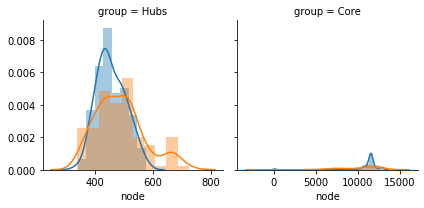

In [74]:
g = sns.FacetGrid(col="group", hue="tissue", sharey=True,
                  sharex=False,
                 data=nums)
g.map(sns.distplot, "node")

## Figures

In [89]:
fig = make_subplots(rows=1, cols=3, specs=[[{'type': 'polar'}]*3],
                   horizontal_spacing=0.12,
                   subplot_titles=['<b>Hubs<b>', '<b>Core<b>', '<b>Control core<b>'])

# Hubs
fig.add_trace(
    go.Scatterpolar(
      r=int_hubs_h['cumulative_intersection'],
      theta=int_hubs_h['layer'],
      fill='toself',
      name='Healthy',
),
    col=1, row=1
)
fig.add_trace(go.Scatterpolar(
      r=int_hubs_b['cumulative_intersection'],
      theta=int_hubs_b['layer'],
      fill='toself',
      name='Basal',
),
    col=1, row=1)

# Cores
fig.add_trace(go.Scatterpolar(
      r=int_cores_h['cumulative_intersection'],
      theta=int_cores_h['layer'],
      fill='toself',
      name='Healthy',
    line=dict(color='#1f77b4'),
    showlegend=False
),
    col=2, row=1)
fig.add_trace(go.Scatterpolar(
      r=int_cores_b['cumulative_intersection'],
      theta=int_cores_b['layer'],
      fill='toself',
      name='Basal',
    line=dict(color='#ff7f0e'),
    showlegend=False
),
    col=2, row=1)


# SBM
fig.add_trace(go.Scatterpolar(
      r=int_sbm_h['cumulative_intersection'],
      theta=int_sbm_b['layer'],
      fill='toself',
      name='Healthy',
    line=dict(color='#1f77b4'),
    showlegend=False
),
    col=3, row=1)

fig.add_trace(go.Scatterpolar(
      r=int_sbm_b['cumulative_intersection'],
      theta=int_sbm_b['layer'],
      fill='toself',
      name='Basal',
    line=dict(color='#ff7f0e'),
    showlegend=False
),
    col=3, row=1)

fig.update_layout(
    legend=dict(orientation='h',yanchor='top',xanchor='center',
                y=0, x=0.5),
    font=dict(
        family="Computer Modern",
        size=10,
        color="#1f1a1a"
    ),
    height=400,
    width=600,
    template=None,
    polar = dict(
        sector = [0, 360],
        hole=0,
        radialaxis = dict(
            angle = 90,
            range=[0, 1], showticklabels=True, ticks=''),
        angularaxis = dict(
            rotation= 180,
            direction= 'clockwise',
            showticklabels=True, tickmode='array',
                                    tickvals= list(range(0,91,10)),
                             ticks='outside', tickangle=0, 
                            ticktext=list(range(100,10,10)),
                           
    ),
        
    ),
    polar2 = dict(
        sector = [0, 360],
        hole=0,
        radialaxis = dict(
            angle=90,
            range=[0, 1], showticklabels=True, ticks=''),
            bgcolor='white',
        angularaxis = dict(
            color='#a5a5a5',
            rotation= 180,
            direction= 'clockwise',
            showticklabels=False, tickmode='array',
                                    tickvals= list(range(0,91,10)),
                             ticks='outside', tickangle=0, 
                            ticktext=list(range(100,10,10)),
                           
    ),
        
    ),
    polar3 = dict(
        sector = [0, 360],
        hole=0,
        radialaxis = dict(
            angle=90,
            range=[0, 1], showticklabels=True, ticks=''),
            bgcolor='white',
        angularaxis = dict(
            color='#a5a5a5',
            rotation= 180,
            direction= 'clockwise',
            showticklabels=False, tickmode='array',
                                    tickvals= list(range(0,91,10)),
                             ticks='outside', tickangle=0, 
                            ticktext=list(range(100,10,10)),
                           
    ),
        
    )
)

fig.show()
fig.write_image(join(FIG, "organization.pdf"),
               format='pdf')